## Heatmap Data Generation and Visualization

Library Initialization

In [1012]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wall Dimensions and simulated number of studs detected

In [1013]:
# Wall dimensions (inches)
length = 72
width = 120

# Number of studs detected
num_studs = 10

Array Initialization

In [1014]:
# Initialize an empty Numpy array
data = np.empty([width,length], dtype=float)

# Set all data points not equal to 0 to 0
data[data != 0] = 0

Range values of wall

In [1015]:
# Generate random number location
x_values = list(range(length))
y_values = list(range(width))

Data generation of 4 studs

In [1016]:
# Random number generate num_studs (x,y) coordinates with a z standard stud length
for x in range(num_studs):
    temp_x = random.choice(x_values)
    temp_y = random.choice(y_values)

    # If there is an overlap
    if(data[temp_y, temp_x] <= 1 and data[temp_y, temp_x] > 0):
        data[:, temp_x]= data[temp_y,temp_x] / 2

    else:
        data[:, temp_x] = 1
   
    # Expand the 4 coordinates by (x+1,y) of 3 iterations (2x4 stud dimension)
    for y in range(1,4,1):
        if(temp_x+y < length):
            
            if(data[temp_y, temp_x+y] <= 1 and data[temp_y, temp_x+y] > 0):
                data[:, temp_x+y] = data[temp_y,temp_x+y] / 2
                continue

            data[:, temp_x+y] = 1
                

Convert to Pandas Dataframe 

In [1017]:
df = pd.DataFrame(data, columns=x_values, index=y_values)

Display Heatmap

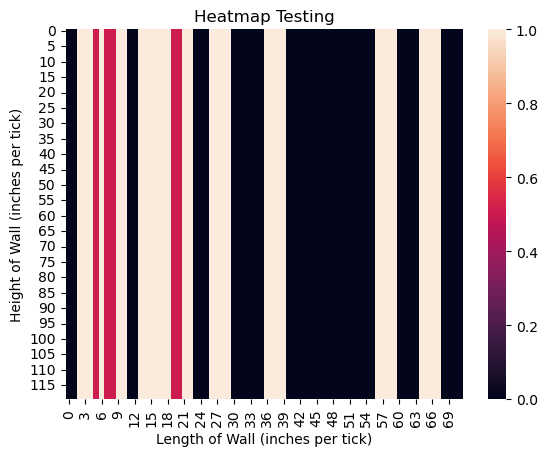

In [1018]:
heat = sns.heatmap(df)
heat.axes.set_xlabel("Length of Wall (inches per tick)")
heat.axes.set_ylabel("Height of Wall (inches per tick)")
heat.axes.set_title("Heatmap Testing")
plt.show()